In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

import pickle

In [27]:
def read_data_and_display_basic_info():
    df = pd.read_csv("Org_Employee.csv")
    print("========= Sample data ============")
    print(df.head())
    print("========= columns ============")
    print(df.columns)
    print("========= shape ============")
    print(df.shape)
    print("========== Info ===========")
    print(df.info())
    print("========= descriptive stats ============")
    print(df.describe())
    return df
df = read_data_and_display_basic_info()

========= Sample data ============
   Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  Sta

In [28]:
df.nunique()

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeID                 4410
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
dtype: int64

In [29]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [30]:
df.drop(columns=["EmployeeID"], inplace=True)
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


### Univariate Exploratory Data Analysis

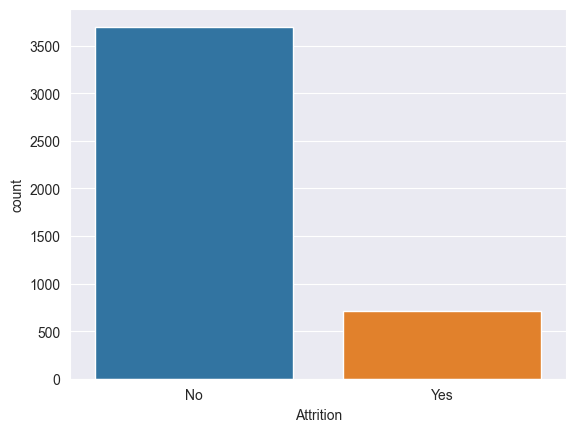

In [31]:
sns.countplot(data=df, x="Attrition")
plt.show()

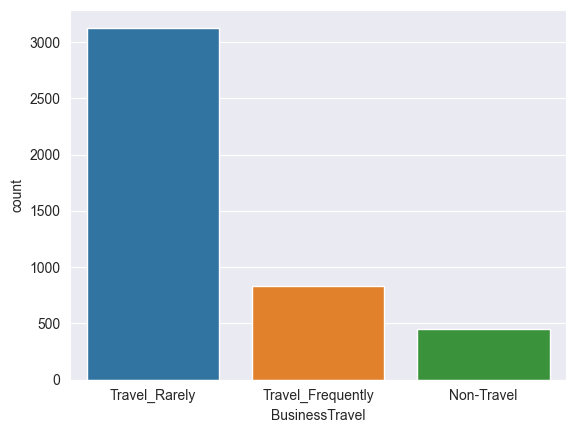

In [32]:
sns.countplot(data=df, x="BusinessTravel")
plt.show()

<Axes: xlabel='Department', ylabel='count'>

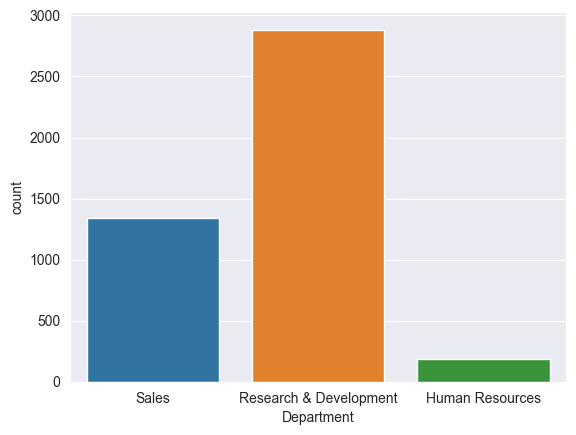

In [33]:
sns.countplot(data=df, x="Department")

<Axes: xlabel='EducationField', ylabel='count'>

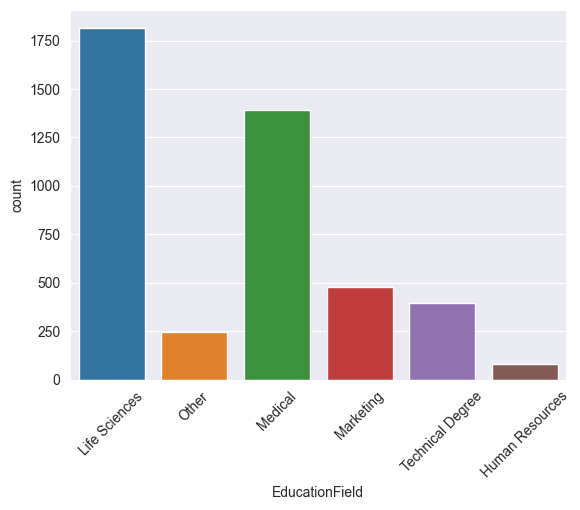

In [34]:
plt.xticks(rotation=45)
sns.countplot(data=df, x="EducationField")

### Bivariate Exploratory Analysis

<Axes: xlabel='BusinessTravel', ylabel='count'>

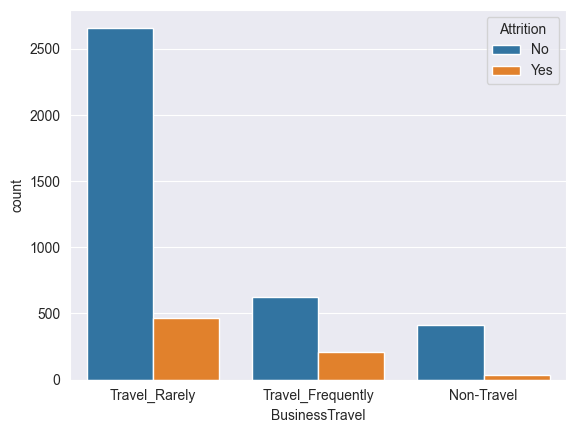

In [35]:
sns.countplot(data=df, x="BusinessTravel", hue="Attrition")

<Axes: xlabel='EducationField', ylabel='count'>

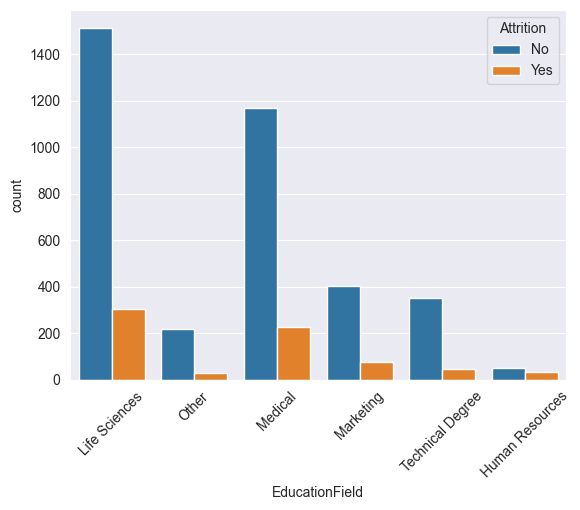

In [36]:
plt.xticks(rotation=45)
sns.countplot(data=df, x="EducationField", hue="Attrition")

<Axes: xlabel='Gender', ylabel='count'>

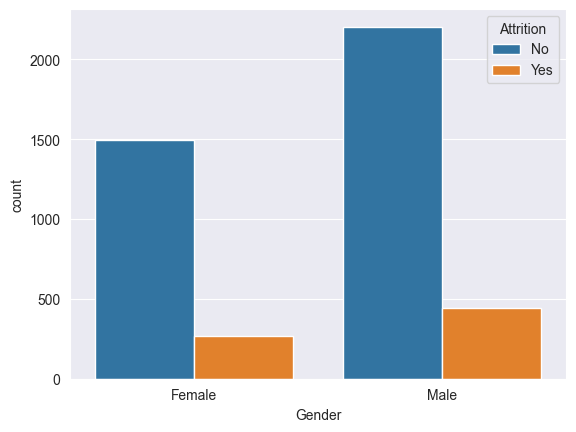

In [37]:
sns.countplot(data=df, x="Gender", hue="Attrition")

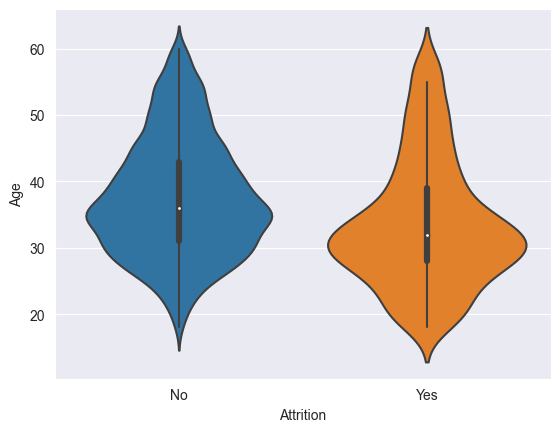

In [38]:
x = sns.violinplot(x="Attrition", y="Age", data=df)

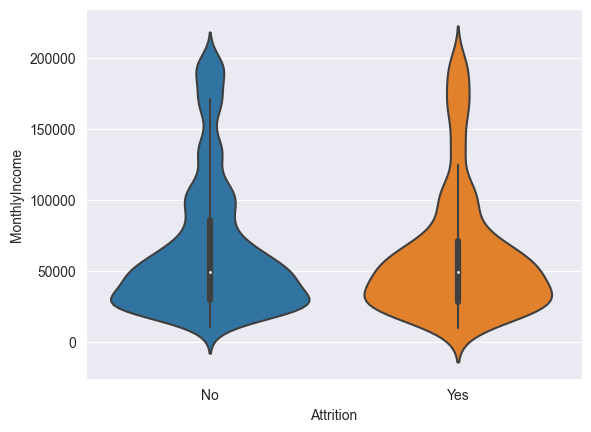

In [39]:
x = sns.violinplot(x="Attrition", y="MonthlyIncome", data=df)

<Axes: >

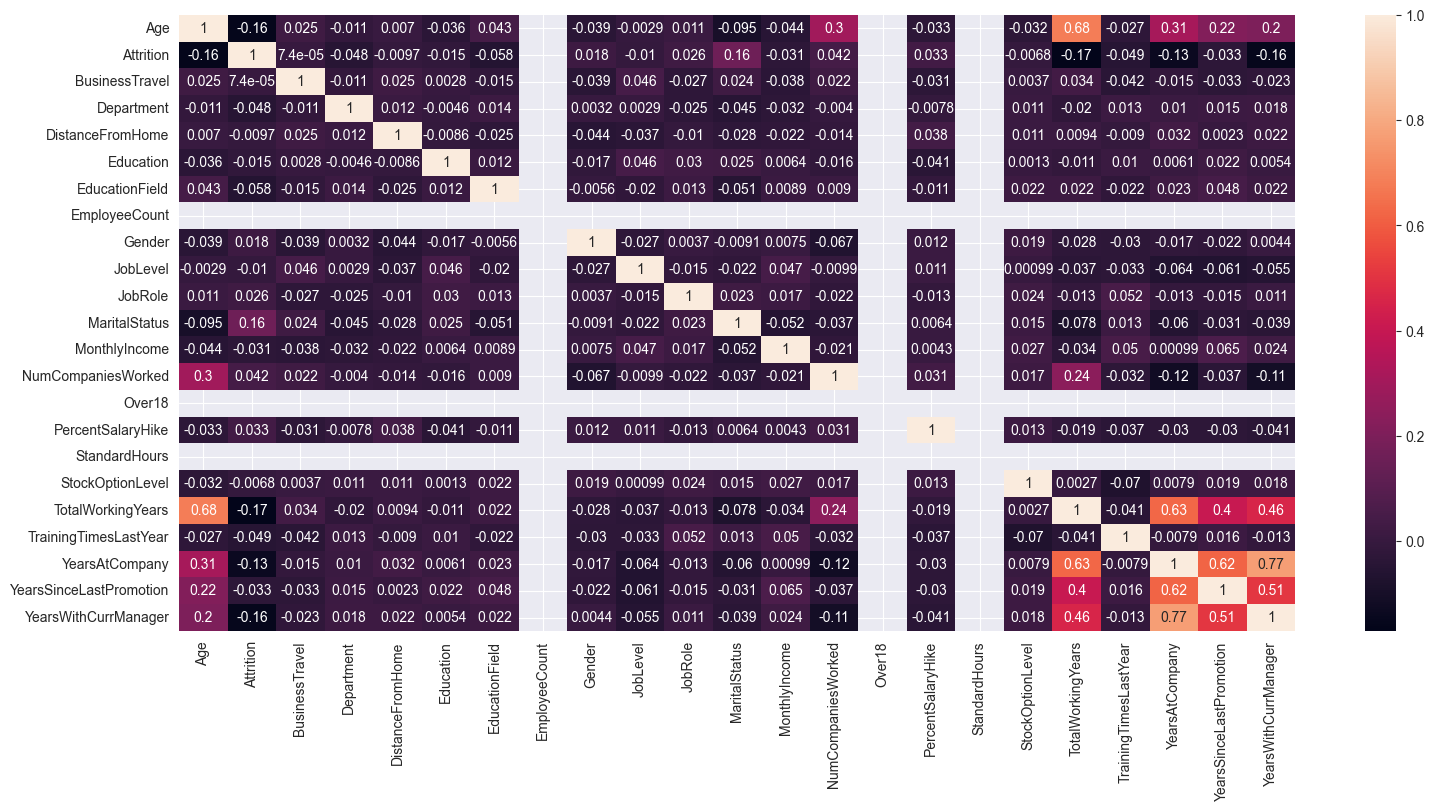

In [40]:
le = LabelEncoder()
df["Attrition"] = le.fit_transform(df["Attrition"])
df["BusinessTravel"] = le.fit_transform(df["BusinessTravel"])
df["Department"] = le.fit_transform(df["Department"])
df["EducationField"] = le.fit_transform(df["EducationField"])
df["Gender"] = le.fit_transform(df["Gender"])
df["JobRole"] = le.fit_transform(df["JobRole"])
df["MaritalStatus"] = le.fit_transform(df["MaritalStatus"])
df["Over18"] = le.fit_transform(df["Over18"])

plt.figure(figsize=(18,8))
corr = df.corr()
sns.heatmap(corr, annot=True,)

In [41]:
df.head(20)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,0,1,...,1.0,0,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,1,0,1,...,0.0,0,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,1,4,...,1.0,0,15,8,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,1,3,...,3.0,0,11,8,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,1,1,...,4.0,0,12,8,2,9.0,2,6,0,4
5,46,0,2,1,8,3,1,1,0,4,...,3.0,0,13,8,0,28.0,5,7,7,7
6,28,1,2,1,11,2,3,1,1,2,...,2.0,0,20,8,1,5.0,2,0,0,0
7,29,0,2,1,18,3,1,1,1,2,...,2.0,0,22,8,3,10.0,2,0,0,0
8,31,0,2,1,1,3,1,1,1,3,...,0.0,0,21,8,0,10.0,2,9,7,8
9,25,0,0,1,7,4,3,1,0,4,...,1.0,0,13,8,1,6.0,2,6,1,5


### Train Test Split

In [42]:
x_train = df.drop(["Attrition"], axis=1)
y_train = df["Attrition"]

X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, stratify=y_train, test_size=0.2)

print(X_train.shape)
print(Y_train.shape)

(3528, 22)
(3528,)


### Preprocessing

In [43]:
numric_columns=x_train.select_dtypes(exclude='object').columns
print(numric_columns)
print('*'*100)
categorical_columns = x_train.select_dtypes(include='object').columns
print(categorical_columns)

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
****************************************************************************************************
Index([], dtype='object')


In [44]:
numeric_features = Pipeline(steps=[('handleMissing',SimpleImputer(strategy='mean')),('scaling', MinMaxScaler())])
print(numeric_features)

categorical_features=Pipeline(steps=[('handlingmissing',SimpleImputer(strategy='most_frequent')),('encoding',OneHotEncoder()),('scaling',MinMaxScaler())])
print(categorical_features)

processing = ColumnTransformer([('numeic',numeric_features,numric_columns),('cat',categorical_features,categorical_columns)])
print(processing)

Pipeline(steps=[('handleMissing', SimpleImputer()),
                ('scaling', MinMaxScaler())])
Pipeline(steps=[('handlingmissing', SimpleImputer(strategy='most_frequent')),
                ('encoding', OneHotEncoder()), ('scaling', MinMaxScaler())])
ColumnTransformer(transformers=[('numeic',
                                 Pipeline(steps=[('handleMissing',
                                                  SimpleImputer()),
                                                 ('scaling', MinMaxScaler())]),
                                 Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')),
          

In [45]:
model1=Pipeline(steps = [('processing',processing),("pca",TruncatedSVD(n_components=9,random_state=0)),('modeling',KNeighborsClassifier())])
model1.fit(x_train,y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeic',
                                                  Pipeline(steps=[('handleMissing',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',...
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('handlingmissing',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder()),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  Index([], dtype='object'))])),
                ('pca', TruncatedSVD(n_components=9, random_state=0)),
                ('modeling', KNeighborsClassifier())])

In [46]:
predicted1 = model1.predict(X_test)
accuracy_score(predicted1, Y_test)

1.0

In [47]:
# This function plots the confusion matrices given y_true, y_pred.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))

    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")

    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")

    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")

    plt.show()

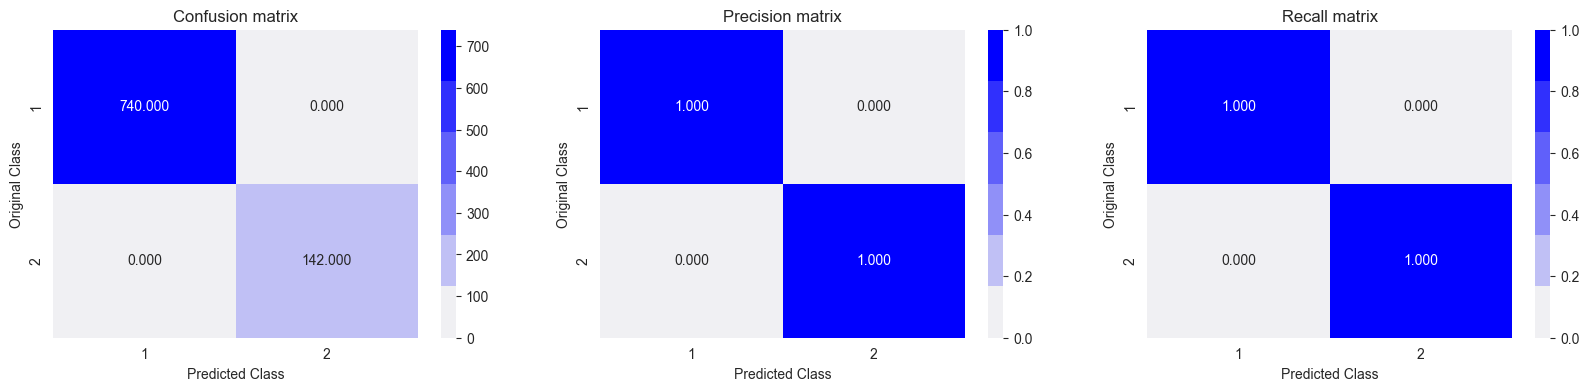

In [48]:
# confusion matrix for Logistic Regression
plot_confusion_matrix(Y_test, predicted1)

In [49]:
# Its important to use binary mode
model_file = open('../KNeighborsClassifier.pkl', 'wb')
pickle.dump(obj=model1, file=model_file)

### Prediction from model - dynamic values

In [50]:
df_2 = pd.DataFrame(columns=['Age','BusinessTravel','Department','DistanceFromHome','Education','EducationField','EmployeeCount','Gender','JobLevel','JobRole','MaritalStatus','MonthlyIncome','NumCompaniesWorked','Over18','PercentSalaryHike','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager'], data=np.array([[28,1,1,11,2,3,1,1,2,7,2,58130,2.0,0,20,8,1,5.0,2,0,0,0]]))
model1.predict(df_2)

array([0])